## Variable identification

in this notebook we are going to look into a few simple but interesting techniques about getting to know more about what is inside the dataset you are given. Whenever you start out on a new project these steps are usually the first that are performed in order to know how to proceed.

We start out by loading the titanic dataset from seaborn

In [1]:
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
sns.set_theme()
sns.set(rc={'figure.figsize':(16,12)})

### description

Let us start out simple and retrieve information about each column, using the .info method we can get non-null counts (giving us an idea if there are nans) and the type of each column (to see if we need to change types).

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


it looks like all types are already correctlyaddressed, but we can see a lot of nans are present for age and deck, this might be a problem!

For numerical columns we can get a bunch of information using the .describe method. this can also be used for categories but has less info

In [3]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.describe(include=['category', 'object'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


### Uniques, frequencies and ranges

the describe method is a bit lacklusting for categorical features, so we use some good old data wrangling to get more info, asking for unique values gives us all the possible values for a column. Aside from the uniques, we can also  get the value counts or frequencies and the range of a column.

In [5]:
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [6]:
titanic_df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [7]:
titanic_df['age'].min(), titanic_df['age'].max()

(0.42, 80.0)

### mean and deviation

to get more information about a numerical range, we calculate the mean and deviation. Note that these statistics imply that our column is normally distributed!

You can also see that I applied the dropna method, this because the calculations cannot handle nan values, but this means our outcome might be distorted from the truth, thread carefuly.

In [8]:
import statistics

In [9]:
titanic_df['age'].dropna().mean()

29.69911764705882

In [10]:
titanic_df['age'].dropna().median()

28.0

### median and interquantile range

When our distribution is not normal, using the median and IQR is advised.
First we apply the shapiro wilk test and it has a very low p-value (the second value) which means we can reject the null-hypothesis that there is a normal distribution. more info about shapiro-wilk can be found on [wikipedia](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

In [11]:
from scipy.stats import shapiro
shapiro(titanic_df['age'].dropna())

ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

In [12]:
titanic_df['age'].dropna().median()

28.0

In [13]:
from scipy.stats import iqr
iqr(titanic_df['age'].dropna())

17.875

In [14]:
from scipy.stats.mstats import mquantiles
mquantiles(titanic_df['age'].dropna())

array([20., 28., 38.])

Appearently the average of 29.70 is fairly higher than the median at 28, meaning that there is a shift towards older people.
You can also see this on the following plot, where we note the mean, median and mode.

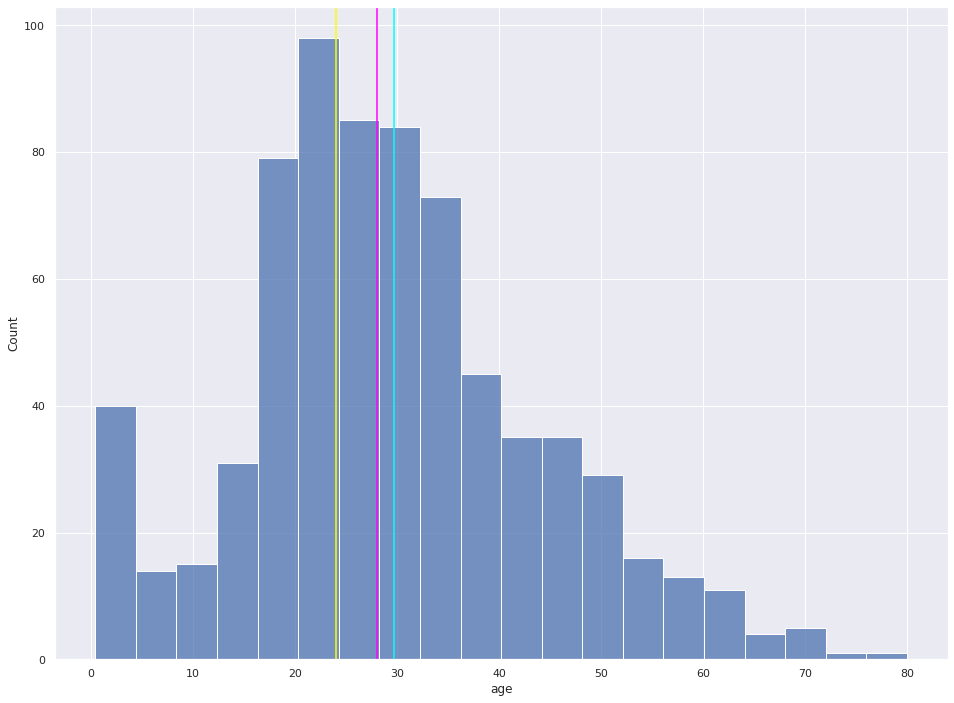

In [15]:
ax = sns.histplot(data=titanic_df, x='age')

ax.axvline(titanic_df.age.mean(), color='cyan')
ax.axvline(titanic_df.age.median(), color='magenta')
ax.axvline(titanic_df.age.mode()[0], color='yellow')

### modes and frequencies

When we don't have numerical data we can still find some interesting results, here we use the mode ( most frequent value) and the proporties of each value to deduce the proporties of people that embarked in the 3 different towns. Nearly 3/4 people embarked in one harbour.

In [16]:
titanic_df['embark_town'].mode()

0    Southampton
dtype: object

In [17]:
titanic_df['embark_town'].value_counts()/len(titanic_df)

Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
Name: embark_town, dtype: float64